In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/Rahul/ML_data/gene_expression.csv")
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


## Visualizing Data | One with Data

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

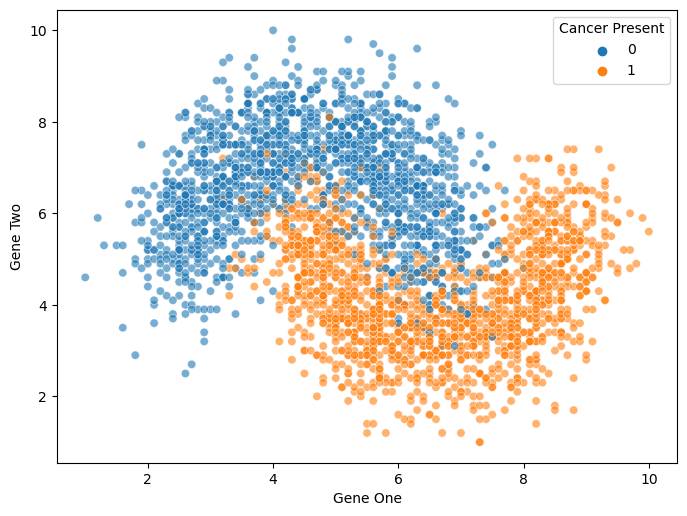

In [3]:
plt.figure(figsize = (8,6), dpi = 100)
sns.scatterplot(data = df, x ='Gene One', y='Gene Two',
                hue = 'Cancer Present', alpha = 0.6)

**Now let's see the point distribution closely**

(4.0, 8.0)

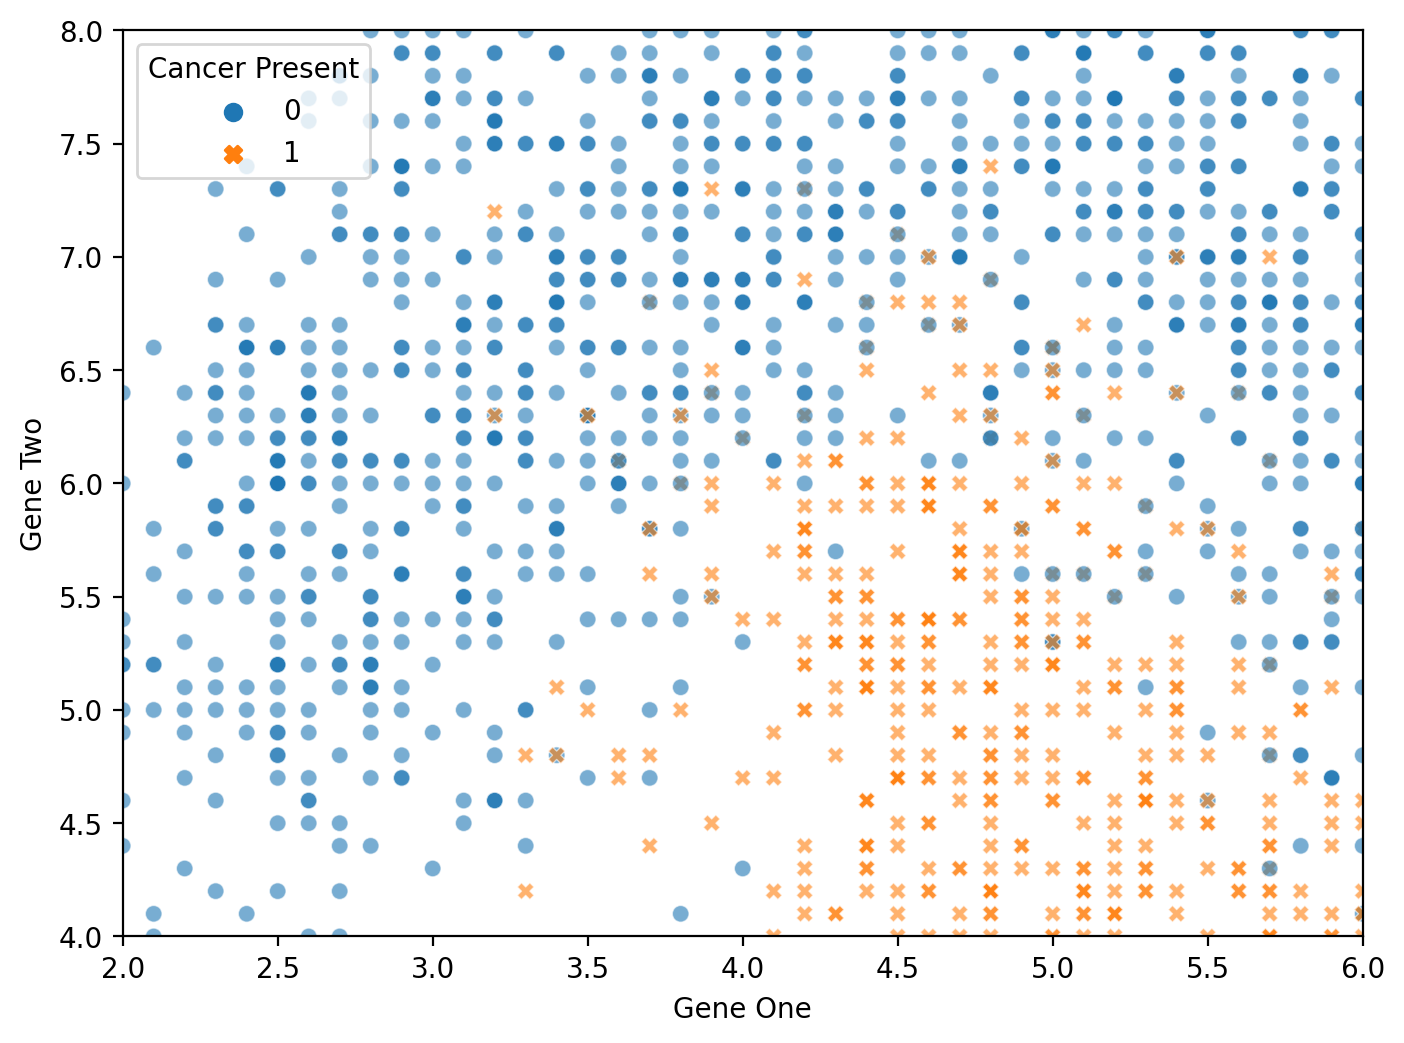

In [4]:
plt.figure(figsize = (8,6), dpi = 200)
sns.scatterplot(data = df, x ='Gene One', y='Gene Two',
                hue = 'Cancer Present', alpha = 0.6, style = 'Cancer Present')
plt.xlim(2, 6)
plt.ylim(4, 8)

**As our data is small so we can use pair plot to find distribution**

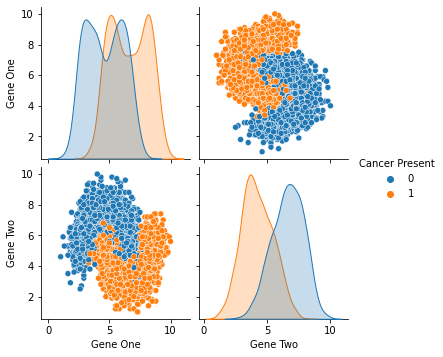

In [5]:
sns.pairplot(data = df,hue = 'Cancer Present' )

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

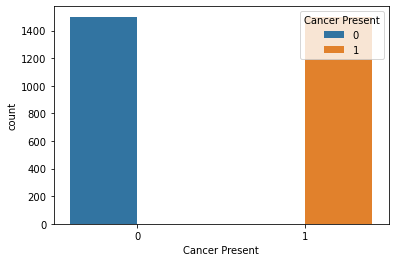

In [6]:
sns.countplot(data = df, x = 'Cancer Present' ,hue = 'Cancer Present')

## Data prep

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = df.drop('Cancer Present', axis = 1)
y = df['Cancer Present']

In [10]:
# spliting our data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

**Scaling data**


In [11]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### Creating model with single K value

In [13]:
knn_model_1 = KNeighborsClassifier(n_neighbors = 1)

In [14]:
knn_model_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [15]:
y_pred = knn_model_1.predict(X_test)
y_pred[:10]

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
confusion_matrix(y_test, y_pred)

array([[259,  33],
       [ 22, 286]], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       292
           1       0.90      0.93      0.91       308

    accuracy                           0.91       600
   macro avg       0.91      0.91      0.91       600
weighted avg       0.91      0.91      0.91       600



## Finding best k-value for our model
* **1.Elbow method**
* **2. n-fold cross-validation**

In [21]:
from sklearn.metrics import accuracy_score

**Elbow method**

In [23]:
# now we know that the error on each k value is determine by 1-accuracy_score
test_errors = []

for k in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(X_train, y_train)
    knn_pred = knn_model.predict(X_test)
    tests = 1-accuracy_score(y_test, knn_pred)
    test_errors.append(tests)

In [24]:
test_errors

[0.09166666666666667,
 0.08666666666666667,
 0.07499999999999996,
 0.07499999999999996,
 0.07333333333333336,
 0.06333333333333335,
 0.06000000000000005,
 0.06499999999999995,
 0.07333333333333336,
 0.06666666666666665,
 0.07166666666666666,
 0.06833333333333336,
 0.06666666666666665,
 0.06833333333333336,
 0.06833333333333336,
 0.06333333333333335,
 0.06333333333333335,
 0.06499999999999995,
 0.06666666666666665,
 0.06499999999999995,
 0.06666666666666665,
 0.06666666666666665,
 0.06499999999999995,
 0.06166666666666665,
 0.06166666666666665,
 0.06333333333333335,
 0.06333333333333335,
 0.06333333333333335,
 0.06499999999999995]

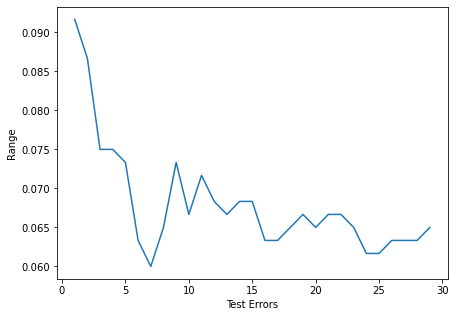

In [27]:
plt.figure(figsize=(7,5))
plt.plot(range(1,30), test_errors)
plt.xlabel('Test Errors')
plt.ylabel('Range');

**N-Fold cross validation| Grid search CV**

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [32]:
scaler = StandardScaler()

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [38]:
operations = [('scaler', scaler), ('knn', knn)]

In [39]:
pipe = Pipeline(operations)

In [40]:
k_values = list(range(1,20))

In [41]:
param_grid = {'knn__n_neighbors': k_values}

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
final_cv_classifier = GridSearchCV(pipe, param_grid, scoring = 'accuracy', cv = 5)

**As we set our pipeline with preprocessing/Scaler and the estimater model. so now we can directly pass our non scaled data**

In [47]:
final_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

**Now let's check out the performce of our model**

In [49]:
y_preds = final_cv_classifier.predict(X_test)
y_preds[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

In [61]:
final_cv_classifier.predict_proba(X_test)

array([[0.52631579, 0.47368421],
       [0.        , 1.        ],
       [1.        , 0.        ],
       ...,
       [0.05263158, 0.94736842],
       [0.        , 1.        ],
       [1.        , 0.        ]])

In [64]:
final_cv_classifier.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__scaler': StandardScaler(),
 'estimator__knn': KNeighborsClassifier(),
 'estimator__scaler__copy': True,
 'estimator__scaler__with_mean': True,
 'estimator__scaler__with_std': True,
 'estimator__knn__algorithm': 'auto',
 'estimator__knn__leaf_size': 30,
 'estimator__knn__metric': 'minkowski',
 'estimator__knn__metric_params': None,
 'estimator__knn__n_jobs': None,
 'estimator__knn__n_neighbors': 5,
 'estimator__knn__p': 2,
 'estimator__knn__weights': 'uniform',
 'estimator': Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
 'n_jobs': None,
 'param_grid': {'knn__n_neighbors': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False

In [65]:
final_cv_classifier.best_params_

{'knn__n_neighbors': 19}

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [52]:
accuracy_score(y_test, y_preds)

0.9333333333333333

In [53]:
confusion_matrix(y_test, y_pred)

array([[259,  33],
       [ 22, 286]], dtype=int64)

In [54]:
len(X_test)

600

In [59]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       292
           1       0.93      0.94      0.94       308

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [55]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

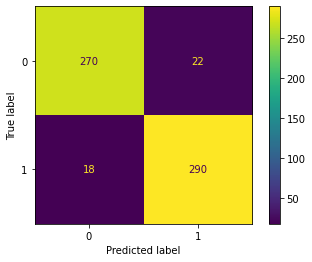

In [57]:
plot_confusion_matrix(final_cv_classifier,X_test, y_test)

**From above plot we find out our model have 93% of accuracy but our model predict 40(0.7%) wrong prediction out of 600 samples**